Loading dataset...
Dataset shape: (27000, 3072)
Number of classes: 10

Testing specific image retrieval:
Image shape: (3072,)
Image class: AnnualCrop
First few pixel values: [149. 121. 120. 148. 119. 120. 150. 120. 122. 148.]


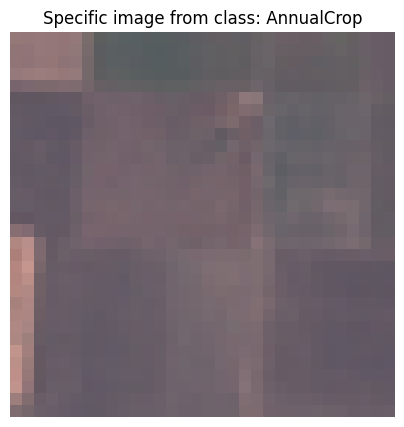

In [1]:
# Import the COC131 class
from coursework import COC131
import numpy as np
import matplotlib.pyplot as plt
from coursework import COC131

# Create an instance of the class
coc_instance = COC131()

# Test 1: Load the entire dataset
print("Loading dataset...")
coc_instance.q1()

# Check if data was loaded properly
print(f"Dataset shape: {coc_instance.x.shape if hasattr(coc_instance, 'x') else 'Not loaded'}")
print(f"Number of classes: {len(set(coc_instance.y)) if hasattr(coc_instance, 'y') else 'Not loaded'}")

# Test 2: Check a random image (if you know a specific filename)
# Replace "sample_image.jpg" with an actual image filename from your dataset
test_filename = "AnnualCrop_1.jpg"  # Change this to a real filename in your dataset
img_array, class_name = coc_instance.q1(filename=test_filename)

print(f"\nTesting specific image retrieval:")
print(f"Image shape: {img_array.shape}")
print(f"Image class: {class_name}")
print(f"First few pixel values: {img_array[:10]}")

# Visualize the specific image that was returned
if img_array is not None:
    # Reshape the specific image back to 32x32x3
    specific_img = img_array.reshape(32, 32, 3)
    
    # Since these are float values, we need to ensure they're in a valid range for display
    specific_img = np.clip(specific_img, 0, 255).astype(np.uint8)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(specific_img)
    plt.title(f"Specific image from class: {class_name}")
    plt.axis('off')
    plt.show()


--- Testing q2: Data Standardization ---
Original data shape: (1000, 3072)
Original data range: [18.00, 221.00]
Original standard deviation: 17.36
Standardized data shape: (1000, 3072)
Standardized data mean: 0.0000
Standardized data std: 2.5000
✓ Standard deviation is correctly set to approximately 2.5


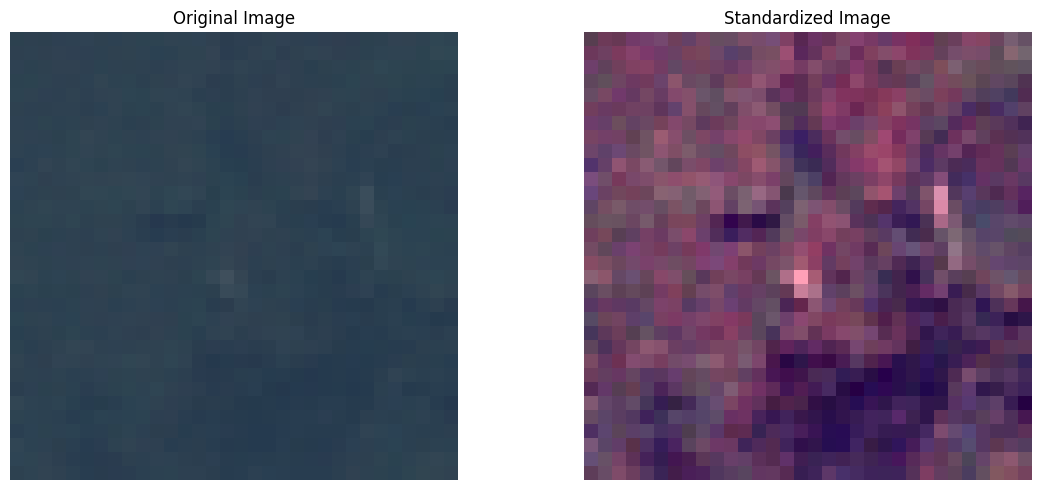


Checking inverse transform:
Mean Squared Error between original and reconstructed: 0.000000
✓ Reconstruction is accurate


In [2]:
# After your q1 testing code, add this to test q2:

# Test q2 with the dataset loaded from q1
print("\n--- Testing q2: Data Standardization ---")

# Make sure we have data from q1
if hasattr(coc_instance, 'x') and coc_instance.x.size > 0:
    # Take a subset to speed up processing if needed
    subset_size = min(1000, len(coc_instance.x))
    data_subset = coc_instance.x[:subset_size]
    
    print(f"Original data shape: {data_subset.shape}")
    print(f"Original data range: [{data_subset.min():.2f}, {data_subset.max():.2f}]")
    print(f"Original standard deviation: {data_subset.std():.2f}")
    
    # Standardize the image data (note the order: standardized_images, scaler)
    standardized_data, scaler = coc_instance.q2(data_subset)
    
    print(f"Standardized data shape: {standardized_data.shape}")
    print(f"Standardized data mean: {standardized_data.mean():.4f}")
    print(f"Standardized data std: {standardized_data.std():.4f}")
    
    # Verify the standard deviation is close to 2.5
    if abs(standardized_data.std() - 2.5) < 0.1:
        print("✓ Standard deviation is correctly set to approximately 2.5")
    else:
        print("✗ Standard deviation is not close to 2.5")
    
    # Visualize an original and standardized image
    plt.figure(figsize=(12, 5))
    
    # Original image
    img = data_subset[0].reshape(32, 32, 3)
    img = np.clip(img, 0, 255).astype(np.uint8)
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    
    # Standardized image (needs rescaling for visualization)
    std_img = standardized_data[0].reshape(32, 32, 3)
    # Scale to 0-255 range for visualization
    std_img = (std_img - std_img.min()) / (std_img.max() - std_img.min()) * 255
    std_img = std_img.astype(np.uint8)
    plt.subplot(1, 2, 2)
    plt.imshow(std_img)
    plt.title("Standardized Image")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Can we transform back?
    print("\nChecking inverse transform:")
    # Get a flattened version of the standardized data
    if len(standardized_data.shape) > 2:
        std_flat = standardized_data.reshape(standardized_data.shape[0], -1)
    else:
        std_flat = standardized_data
    
    # Inverse transform (divide by 2.5 first since we scaled it up)
    inverse_transform = scaler.inverse_transform(std_flat / 2.5)
    
    # Reshape back if needed
    if len(data_subset.shape) > 2:
        inverse_transform = inverse_transform.reshape(data_subset.shape)
    
    # Check the difference
    mse = ((data_subset - inverse_transform) ** 2).mean()
    print(f"Mean Squared Error between original and reconstructed: {mse:.6f}")
    
    if mse < 1e-10:
        print("✓ Reconstruction is accurate")
    else:
        print("✗ Reconstruction has errors")
else:
    print("Image dataset not loaded. Run q1() first to load the dataset.")


--- Testing q3: MLP Classifier Training ---
Using 5000 samples for training/testing
Starting hyperparameter optimization...
Testing combination 1/2: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'alpha': 0.001, 'learning_rate': 'adaptive'}
  Average CV score: 0.9603
  New best parameters found!
Testing combination 2/2: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'alpha': 0.001, 'learning_rate': 'adaptive'}
  Average CV score: 0.9605
  New best parameters found!
Hyperparameter optimization completed in 11.08 seconds.
Best parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'alpha': 0.001, 'learning_rate': 'adaptive'} with score: 0.9605
Training final model with best parameters...
Iteration 1, loss = 0.29529479
Iteration 2, loss = 0.15875150
Iteration 3, loss = 0.07942934
Iteration 4, loss = 0.05977801
Iteration 5, loss = 0.06302148
Iteration 6, loss = 0.05015388
Iteration 7, loss = 0.03900080
Iteration 8, loss = 0.03869524
Iteration 9, loss = 0.0223071

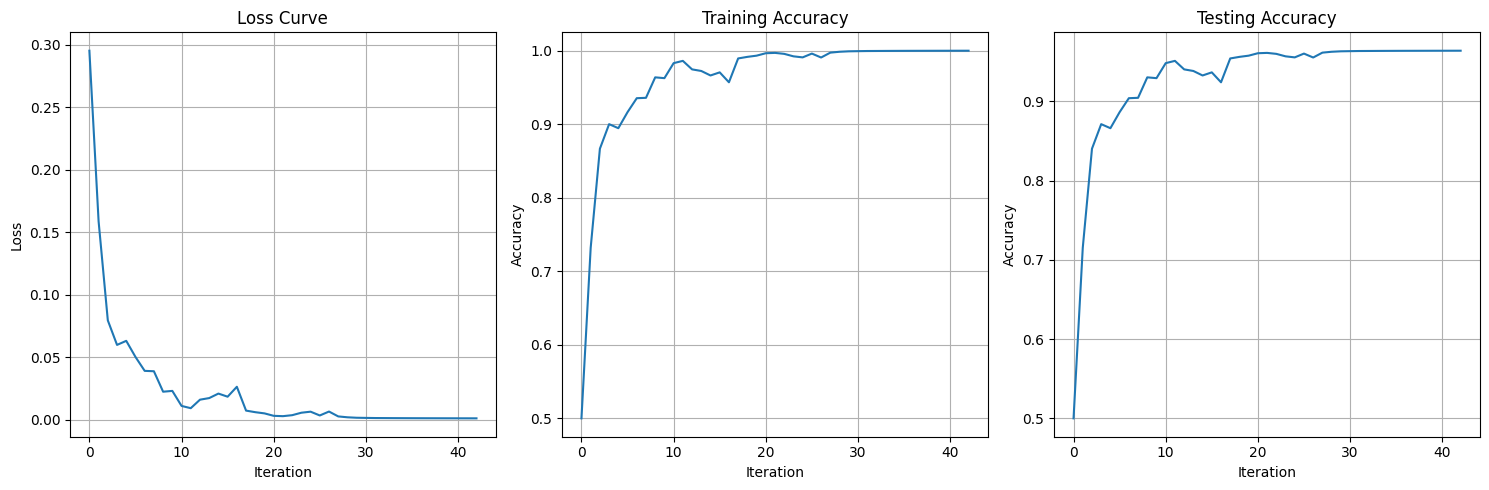


Best hyperparameters:
activation: relu
alpha: 0.001
hidden_layer_sizes: (100, 50)
learning_rate: adaptive


In [3]:
# Test q3: Build and evaluate an MLP Classifier
print("\n--- Testing q3: MLP Classifier Training ---")

# If you want to reduce computation time, you can use a smaller subset of data
subset_size = 5000  # Adjust based on your computational resources
coc_instance.x = coc_instance.x[:subset_size]
coc_instance.y = coc_instance.y[:subset_size]
print(f"Using {len(coc_instance.x)} samples for training/testing")

# Define a smaller hyperparameter grid for testing
test_hyperparam = {
    'hidden_layer_sizes': [(50,), (100, 50)],
    'activation': ['relu'],
    'alpha': [0.001],
    'learning_rate': ['adaptive']
}

# Run the q3 function with our test hyperparameters
model, loss_history, train_acc_history, test_acc_history = coc_instance.q3(
    test_size=0.2, 
    hyperparam=test_hyperparam
)

# Visualize the training progress
plt.figure(figsize=(15, 5))

# Plot loss
plt.subplot(1, 3, 1)
plt.plot(loss_history)
plt.title('Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)

# Plot training accuracy
plt.subplot(1, 3, 2)
plt.plot(train_acc_history)
plt.title('Training Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot testing accuracy
plt.subplot(1, 3, 3)
plt.plot(test_acc_history)
plt.title('Testing Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the best hyperparameters found
print("\nBest hyperparameters:")
for param, value in model.get_params().items():
    if param in test_hyperparam:
        print(f"{param}: {value}")


--- Testing q4: Impact of Alpha on Model Performance ---
Training model with alpha=0
  Train accuracy: 1.0000
  Test accuracy: 0.9660
  Iterations to converge: 40
  Parameter norm: 17.3150
Training model with alpha=0.001
  Train accuracy: 1.0000
  Test accuracy: 0.9640
  Iterations to converge: 43
  Parameter norm: 17.2975
Training model with alpha=0.005
  Train accuracy: 0.9885
  Test accuracy: 0.9570
  Iterations to converge: 34
  Parameter norm: 18.8524
Training model with alpha=0.01
  Train accuracy: 1.0000
  Test accuracy: 0.9640
  Iterations to converge: 38
  Parameter norm: 16.6138
Training model with alpha=0.05
  Train accuracy: 0.9928
  Test accuracy: 0.9580
  Iterations to converge: 90
  Parameter norm: 15.8686
Training model with alpha=0.1
  Train accuracy: 0.9895
  Test accuracy: 0.9490
  Iterations to converge: 90
  Parameter norm: 14.0500
Training model with alpha=0.5
  Train accuracy: 0.9995
  Test accuracy: 0.9600
  Iterations to converge: 45
  Parameter norm: 9.6127
T

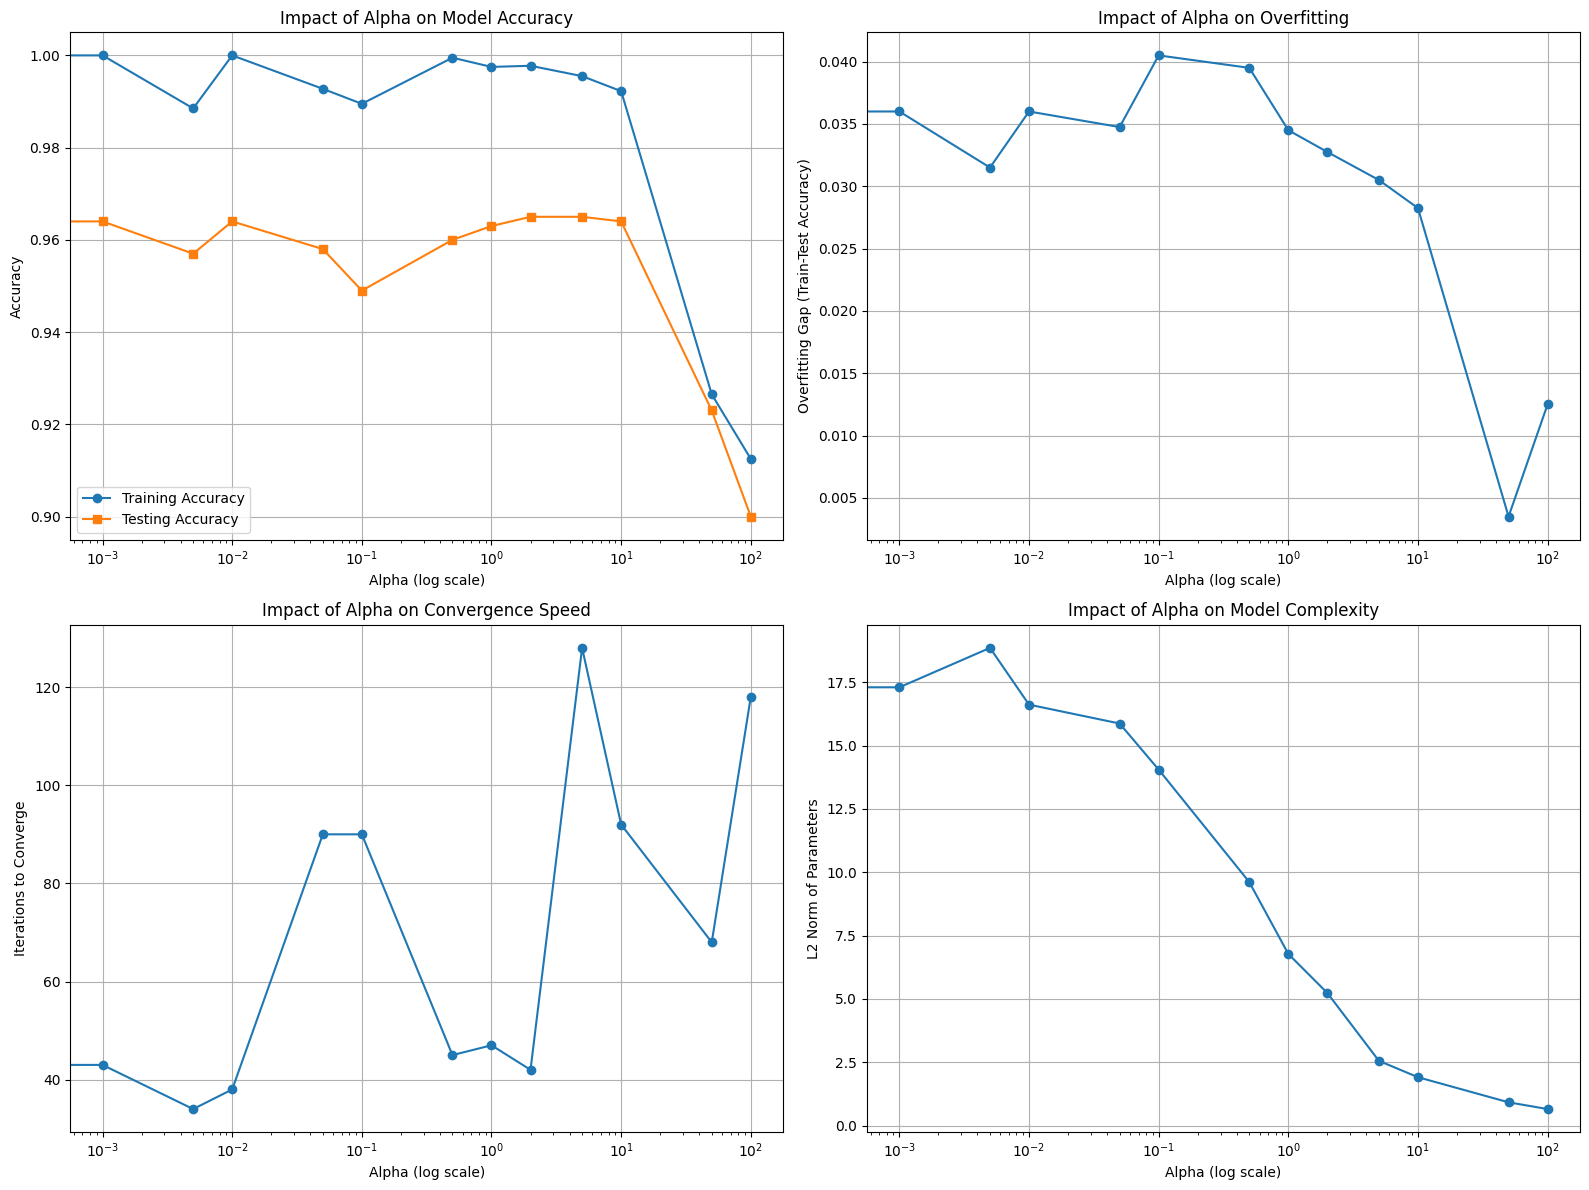


Optimal alpha value: 0
Best test accuracy: 0.9660
Overfitting gap at this alpha: 0.0340

Alpha Performance Summary:
--------------------------------------------------------------------------------
Alpha      Train Acc    Test Acc     Gap        Iterations   Param Norm  
--------------------------------------------------------------------------------
0.000      1.0000       0.9660       0.0340     40           17.3150     
0.001      1.0000       0.9640       0.0360     43           17.2975     
0.005      0.9885       0.9570       0.0315     34           18.8524     
0.010      1.0000       0.9640       0.0360     38           16.6138     
0.050      0.9928       0.9580       0.0348     90           15.8686     
0.100      0.9895       0.9490       0.0405     90           14.0500     
0.500      0.9995       0.9600       0.0395     45           9.6127      
1.000      0.9975       0.9630       0.0345     47           6.7790      
2.000      0.9978       0.9650       0.0328     42     

In [4]:
# Test q4: Study impact of alpha on model performance
print("\n--- Testing q4: Impact of Alpha on Model Performance ---")

# Run q4 function
alpha_results = coc_instance.q4()

# Visualization 1: Accuracy vs Alpha
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.semilogx(alpha_results['alpha_values'], alpha_results['train_accuracy'], 'o-', label='Training Accuracy')
plt.semilogx(alpha_results['alpha_values'], alpha_results['test_accuracy'], 's-', label='Testing Accuracy')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Accuracy')
plt.title('Impact of Alpha on Model Accuracy')
plt.grid(True)
plt.legend()

# Visualization 2: Overfitting Gap vs Alpha
plt.subplot(2, 2, 2)
overfitting_gap = alpha_results['train_accuracy'] - alpha_results['test_accuracy']
plt.semilogx(alpha_results['alpha_values'], overfitting_gap, 'o-')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Overfitting Gap (Train-Test Accuracy)')
plt.title('Impact of Alpha on Overfitting')
plt.grid(True)

# Visualization 3: Convergence Iterations vs Alpha
plt.subplot(2, 2, 3)
plt.semilogx(alpha_results['alpha_values'], alpha_results['convergence_iterations'], 'o-')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Iterations to Converge')
plt.title('Impact of Alpha on Convergence Speed')
plt.grid(True)

# Visualization 4: Parameter Norm vs Alpha
plt.subplot(2, 2, 4)
plt.semilogx(alpha_results['alpha_values'], alpha_results['param_norms'], 'o-')
plt.xlabel('Alpha (log scale)')
plt.ylabel('L2 Norm of Parameters')
plt.title('Impact of Alpha on Model Complexity')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print optimal alpha based on test accuracy
best_alpha_idx = np.argmax(alpha_results['test_accuracy'])
best_alpha = alpha_results['alpha_values'][best_alpha_idx]
best_test_acc = alpha_results['test_accuracy'][best_alpha_idx]

print(f"\nOptimal alpha value: {best_alpha}")
print(f"Best test accuracy: {best_test_acc:.4f}")
print(f"Overfitting gap at this alpha: {overfitting_gap[best_alpha_idx]:.4f}")

# Create a summary table
print("\nAlpha Performance Summary:")
print("-" * 80)
print(f"{'Alpha':<10} {'Train Acc':<12} {'Test Acc':<12} {'Gap':<10} {'Iterations':<12} {'Param Norm':<12}")
print("-" * 80)
for i, alpha in enumerate(alpha_results['alpha_values']):
    print(f"{alpha:<10.3f} {alpha_results['train_accuracy'][i]:<12.4f} {alpha_results['test_accuracy'][i]:<12.4f} "
          f"{overfitting_gap[i]:<10.4f} {alpha_results['convergence_iterations'][i]:<12.0f} "
          f"{alpha_results['param_norms'][i]:<12.4f}")